In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px 
import statsmodels.api as sm
 

In [116]:
df=pd.read_csv('yellow_tripdata.csv')

In [117]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [118]:
df.shape

(6405008, 18)

In [119]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [120]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [121]:
filter_data = df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]
filter_data


,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [122]:
filter_data.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [123]:
percentage = (65441 / len(filter_data)) * 100
print(percentage)

1.021716132126611


In [124]:
filter_data.dropna(inplace=True)
filter_data


,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [125]:
filter_data['passenger_count'] = filter_data['passenger_count'].astype('int64')
filter_data['payment_type'] = filter_data['payment_type'].astype('int64') 
filter_data[filter_data.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [126]:
filter_data.drop_duplicates(inplace=True)


In [127]:
filter_data['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [128]:
filter_data['payment_type'].value_counts(normalize = True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [129]:
filtered_by_payment = filter_data[filter_data['payment_type'] < 4]
print(filtered_by_payment.shape)

(2991503, 5)


In [130]:

filtered_by_passenger = filter_data[(filter_data['passenger_count'] > 0) & (filter_data['passenger_count'] < 6)]
print(filtered_by_passenger.shape)

(2820394, 5)


In [199]:
combined_filter = filter_data[(filter_data['payment_type'] < 4) & 
                              (filter_data['passenger_count'] > 0) & 
                              (filter_data['passenger_count'] < 6)]
print(combined_filter.shape)

(2804693, 5)


In [184]:
combined_filter['payment_type'].replace([1, 2,3 ], ['Card', 'Cash','Other'],inplace=True) 
combined_filter

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000
6339564,1,Card,12.5,2.55,16.283333


In [133]:
# to check outliers and min . #

In [134]:
 combined_filter.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.804693e+06,2.804693e+06,2.804693e+06,2.804693e+06
mean,1.730310e+00,1.772910e+01,4.524062e+00,2.405386e+01
std,1.174357e+00,1.515588e+01,4.894722e+00,9.228744e+01
min,1.000000e+00,-1.238000e+03,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.490000e+00,9.816667e+00
50%,1.000000e+00,1.300000e+01,2.710000e+00,1.568333e+01
75%,2.000000e+00,2.100000e+01,5.450000e+00,2.331667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [135]:
# To remove those negative value of min because fare amount ,trip distance ,duration cannot be in negative #

In [136]:
combined_filter = combined_filter[combined_filter['fare_amount'] > 0]
combined_filter = combined_filter[combined_filter['trip_distance'] > 0]
combined_filter = combined_filter[combined_filter['duration'] > 0]

combined_filter.describe() 
 

,passenger_count,fare_amount,trip_distance,duration
count,2.766283e+06,2.766283e+06,2.766283e+06,2.766283e+06
mean,1.735552e+00,1.765219e+01,4.578629e+00,2.411811e+01
std,1.177426e+00,1.448228e+01,4.896579e+00,9.243958e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.520000e+00,9.916667e+00
50%,1.000000e+00,1.300000e+01,2.760000e+00,1.571667e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.330000e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [137]:
# To visualize the outliers # 

(array([2.766262e+06, 1.800000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 4.265090e+02, 8.530080e+02, 1.279507e+03,
        1.706006e+03, 2.132505e+03, 2.559004e+03, 2.985503e+03,
        3.412002e+03, 3.838501e+03, 4.265000e+03]),
 <BarContainer object of 10 artists>)

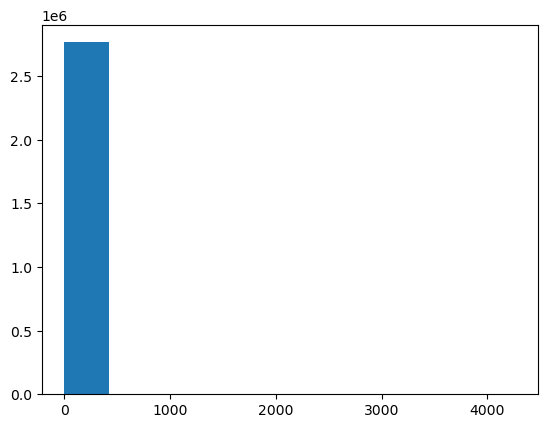

In [138]:
plt.hist(combined_filter['fare_amount'])

In [139]:
for col in['fare_amount','trip_distance','duration']:
    q1 = combined_filter[col].quantile(0.25)
    q3 = combined_filter[col].quantile(0.75)
    IQR = q3-q1
    
    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    combined_filter = combined_filter[(combined_filter[col] >= lower_bound) & (combined_filter[col]<=upper_bound)]

combined_filter


,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


In [140]:
# Distribution 


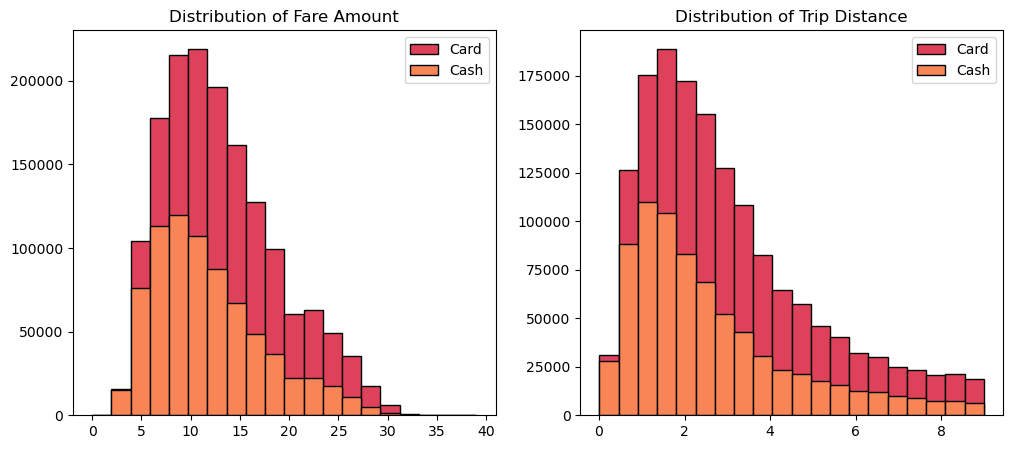

In [141]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(combined_filter[combined_filter['payment_type']=='Card']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color = '#de425b',label ='Card')
plt.hist(combined_filter[combined_filter['payment_type']=='Cash']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color = '#f78555',label ='Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(combined_filter[combined_filter['payment_type']=='Card']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color = '#de425b',label ='Card')
plt.hist(combined_filter[combined_filter['payment_type']=='Cash']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color = '#f78555',label ='Cash')
plt.legend()
plt.show()


In [142]:
combined_filter.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.119874  5.856987      2.994873  1.995986
Cash           11.764015  5.620148      2.604397  1.916833
Other          10.452211  6.098165      2.341474  2.040516

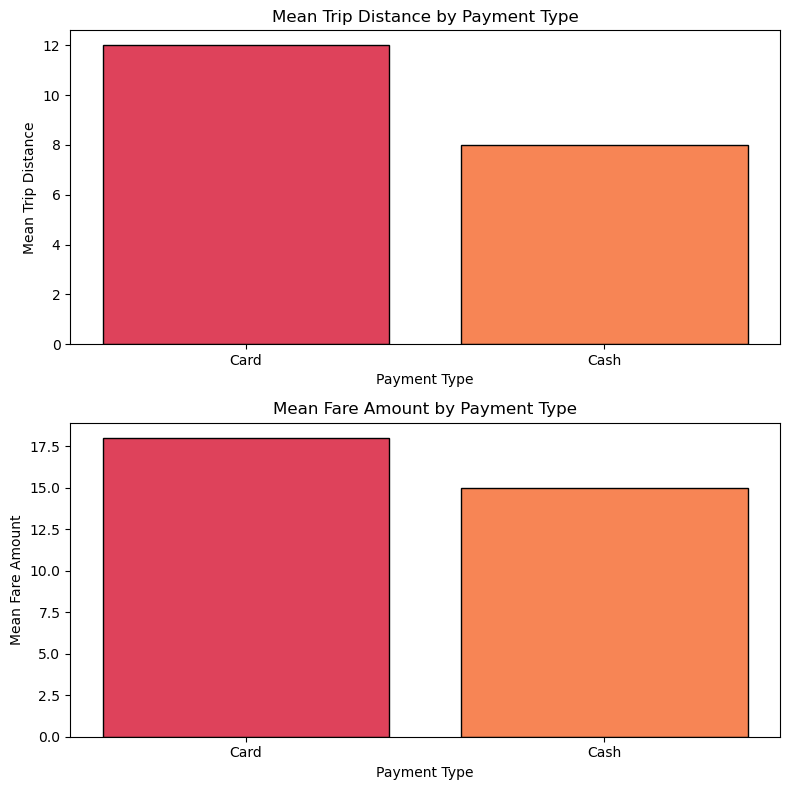

In [143]:
 
payment_types = ["Card", "Cash" ]
mean_trip_distance = [12, 8,]  # Average trip distance for each payment type
mean_fare_amount = [18, 15, ]  # Average fare amount for each payment type


# Create separate plots for mean trip distance and mean fare amount
plt.figure(figsize=(8, 8))  # Adjust figure size as needed

# Plot for Mean Trip Distance
plt.subplot(2, 1, 1)   
plt.bar(payment_types, mean_trip_distance, edgecolor='k', color=['#de425b', '#f78555'])
plt.xlabel("Payment Type")
plt.ylabel("Mean Trip Distance")
plt.title("Mean Trip Distance by Payment Type")

# Plot for Mean Fare Amount
plt.subplot(2, 1, 2)  
plt.bar(payment_types, mean_fare_amount,edgecolor='k', color=['#de425b', '#f78555'])
plt.xlabel("Payment Type")
plt.ylabel("Mean Fare Amount")
plt.title("Mean Fare Amount by Payment Type")

 
plt.tight_layout()
plt.show()

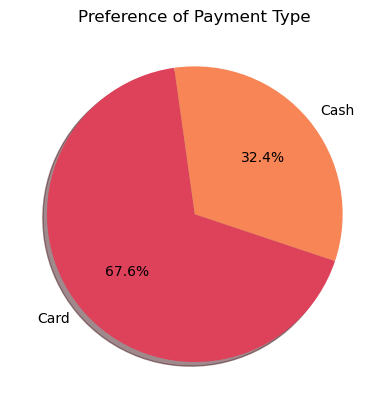

In [144]:
payment_type = ['Card', 'Cash']
payment_counts = [23,11,]  

 #Create the pie chart
plt.pie(payment_counts, labels=payment_type, autopct="%1.1f%%", startangle=98, shadow=True, colors=['#de425b', '#f78555'])
plt.title('Preference of Payment Type')
plt.show()


In [145]:
# Payment Method Affects Passenger Count #

In [146]:
combined_filter.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
Card         1                         909870
             2                         327765
             3                         122444
             4                          63692
             5                         124072
Cash         1                         460764
             2                         155528
             3                          54516
             4                          32721
             5                          47642
Other        1                          11506
             2                           2291
             3                            561
             4                            353
             5                             21

In [147]:
passenger_count=combined_filter.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace = True)
passenger_count.reset_index(inplace=True)
passenger_count


,payment_type,passenger_count,count
0,Card,1,909870
1,Card,2,327765
2,Card,3,122444
3,Card,4,63692
4,Card,5,124072
5,Cash,1,460764
6,Cash,2,155528
7,Cash,3,54516
8,Cash,4,32721
9,Cash,5,47642


In [148]:
passenger_count.loc[10,'payment_type']
passenger_count

,payment_type,passenger_count,count
0,Card,1,909870
1,Card,2,327765
2,Card,3,122444
3,Card,4,63692
4,Card,5,124072
5,Cash,1,460764
6,Cash,2,155528
7,Cash,3,54516
8,Cash,4,32721
9,Cash,5,47642


In [149]:
# to check indivual percentage of passenger_count based on payment type #

In [150]:
passenger_count['percentage']=(passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,percentage
0,Card,1,909870,39.324541
1,Card,2,327765,14.165989
2,Card,3,122444,5.292024
3,Card,4,63692,2.752765
4,Card,5,124072,5.362386
5,Cash,1,460764,19.914200
6,Cash,2,155528,6.721913
7,Cash,3,54516,2.356179
8,Cash,4,32721,1.414200
9,Cash,5,47642,2.059085


In [151]:
combined_filter = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
combined_filter['payment_type'] = ['Card','Cash' ]
combined_filter.iloc[0,1:]=passenger_count.iloc[0:5,-1]
combined_filter.iloc[1,1:]=passenger_count.iloc[5:10,-1]
# combined_filter.iloc[1,2:]=passenger_count.iloc[10:,-1] ### Need to fix this ##
combined_filter

,payment_type,1,2,3,4,5
0,Card,39.324541,14.165989,5.292024,2.752765,5.362386
1,Cash,19.9142,6.721913,2.356179,1.4142,2.059085


In [152]:
# To plot bar chart based on payment type by indivial passenger count 

<Figure size 1000x600 with 0 Axes>

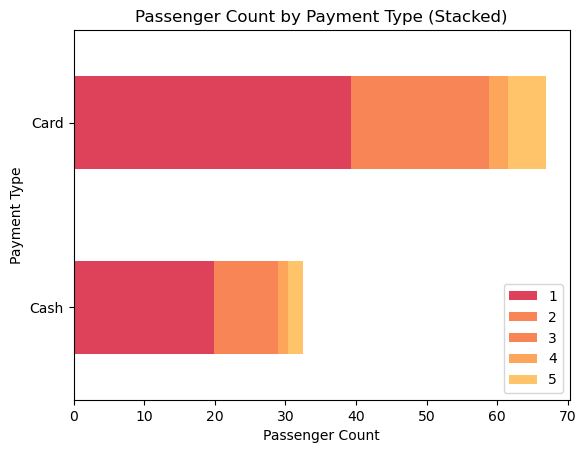

In [153]:
 
# Assuming your data is stored in a pandas dataframe named 'combined_filter'
plt.figure(figsize=(10, 6))
combined_filter.plot(x="payment_type", kind='barh', stacked=True, color=['#de425b', '#f78555', '#f78555','#fda55b', '#ffc469'])
 

plt.xlabel("Passenger Count")
plt.ylabel("Payment Type")
plt.xlabel("Passenger Count")
plt.ylabel("Payment Type")
plt.title("Passenger Count by Payment Type (Stacked)")
plt.gca().invert_yaxis()  
plt.show()



 Null Hypothesis: The average fare for credit card users is the same as the average fare for cash users.

 Alternative Hypothesis: The average fare for credit card users is different from the average fare for cash users.

In [190]:
card_sample = combined_filter[combined_filter['payment_type']=='Card']['fare_amount']
cash_sample = combined_filter[combined_filter['payment_type']=='Cash']['fare_amount']

t_stats, p_value = st.ttest_ind(a=card_sample, b=cash_sample, equal_var=False)
print('T statistic', t_stats, 'p-value', p_value)


T statistic 167.36984686635003 p-value 0.0


Hence Alternative Hypothesis proved : The average fare for credit card users is different from the average fare for cash users.